/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


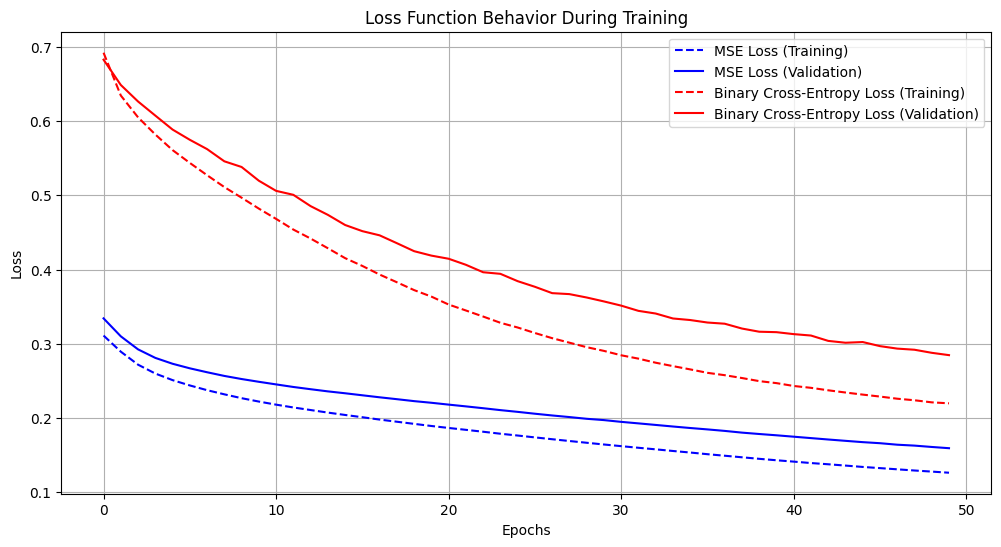

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Step 1: Generate synthetic binary classification data
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    random_state=42
)
y = y.reshape(-1, 1)  # Reshaping the target for compatibility with Keras

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define a simple neural network model
def build_model(loss_function):
    """
    Builds and compiles a simple neural network model.

    Parameters:
    loss_function (str): The loss function to use ('mse' or 'binary_crossentropy').

    Returns:
    model: A compiled Keras Sequential model.
    """
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer=SGD(learning_rate=0.01), loss=loss_function, metrics=['accuracy'])
    return model

# Step 3: Train models with different loss functions
# Using Mean Squared Error (MSE) as the loss function
model_mse = build_model(MeanSquaredError())
history_mse = model_mse.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

# Using Binary Cross-Entropy as the loss function
model_bce = build_model(BinaryCrossentropy())
history_bce = model_bce.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

# Step 4: Visualize loss function behavior during training
plt.figure(figsize=(12, 6))

# Plot for MSE loss
plt.plot(history_mse.history['loss'], label='MSE Loss (Training)', linestyle='--', color='blue')
plt.plot(history_mse.history['val_loss'], label='MSE Loss (Validation)', color='blue')

# Plot for Binary Cross-Entropy loss
plt.plot(history_bce.history['loss'], label='Binary Cross-Entropy Loss (Training)', linestyle='--', color='red')
plt.plot(history_bce.history['val_loss'], label='Binary Cross-Entropy Loss (Validation)', color='red')

# Add labels, legend, and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Behavior During Training')
plt.legend()
plt.grid(True)
plt.show()